# Module 2: Factor Models

This module allows coursera course participants to create their own factor models.

## Table of Contents:
&nbsp;&nbsp;0. [Instructions](#0)

&nbsp;&nbsp;1. [Data and Parameter Setup](#1)

&nbsp;&nbsp;&nbsp;1.0 [User Defined Parameters](#1.0)

&nbsp;&nbsp;&nbsp;1.1 [Instructor Defined Parameters](#1.1)

&nbsp;&nbsp;&nbsp;1.2 [Checking Parameter Definitions](#1.2)

&nbsp;&nbsp;2. [User Defined Factor Models](#2)

&nbsp;&nbsp;&nbsp;2.0 [Cumulative Asset Return](#2.0)

&nbsp;&nbsp;&nbsp;2.1 [OLS Model](#2.1)

&nbsp;&nbsp;&nbsp;2.2 [CV LASSO Model](#2.2)

&nbsp;&nbsp;&nbsp;2.3 [CV Elastic Net Model](#2.3)

&nbsp;&nbsp;&nbsp;2.4 [Best Subset Regression Model](#2.4)



# 0 Instructions <a class="anchor" id="0."></a>

This notebook allows course participants to compare and constract different factor models.  This notebook runs OLS, LASSO, Elastic Net, and Best Subset Regression.  Feel free to compare and contrast any results you get in this section to the results in the supplementary materials.

To run this notebook, change the variables in section 1.0, then click Kernel -> Restart and Run All.  The notebook should take around 15-25 second to run.  In order to answer the Lab questions, the course participant must change a few of the parameters in this notebook.  Here we list the parameters and give their definitions.


## Change these parameters for Lab 1

  * assetNameUser: string, names the asset you wish to model
  * dateNameUser: defines the date column in your data set
  * startDateUser: defines the start date for your analysis
  * endDateUser: defines the end date for your analysis
  * maxVarUser: int, defines the number of allowed non-zero factor loadings in the best subset regression.
  
Here are variables the user should not change unless they are running their own independent factor analysis.

## Other Parameters: Do not change unless you are running your own analysis

  * dataPathUser: string, relative path to the data
  * factorNameUser: list, defines the dependent variable (or factors)
  * numL1RatioUser, numL2RatioUser: int, defines the number of L1/L2 penalty values to try in elastic net cross validation

**IF THE NOTEBOOK DOES NOT RUN TO COMPLETION** Check the variables in section 1.0 have been defined correctly.

#  1 Data and Environment Setup <a class="anchor" id="1"></a>
For the first step, let's import necessary packages and define our functions:


In [1]:
#import all the necessary packages
import numpy as np #for numerical array data
import pandas as pd #for tabular data
import matplotlib.pyplot as plt #for plotting purposes

%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import importlib as imp

import FactorModelLib as fm #the code that wraps around the sikitlearn implementations

import warnings
warnings.filterwarnings('ignore')

## 1.0: User Defined Parameters <a class="anchor" id="1.0"></a>
In this section, you define the parameters of your analysis

In [2]:
#User Analysis Section.  Change the variables in this section to run the analysis you want

#assetNameUser: List, defines the dependent variable, the factor to be explained
assetNameUser = 'Commodities'

#Start and End Dates for the Analysis: Start and End Date for the analysis.
startDateUser = '2000-01-01'
endDateUser = '2018-09-01'

#maxVarUser: Integer, defines the number of non-zero coeficients to allow in best subset regression
maxVarsUser = 3

## 1.1: Instructor Defined Parameters <a class="anchor" id="1.0"></a>
In this section, we define other parameters related to running the notebook.  Note, the user should not change these parameters unless they are running analysis unrelated to the course.

In [3]:
#dataPathUser: Path to User Defined Data
dataPathUser = 'Data/Data_Oct2018_v2.csv'

#dateName: string, names the date column in the data set.  DO NOT CHANGE
dateNameUser = 'Date'

#factorNameUser: List, defines the factors to use in your factor model
factorNameUser= ['World Equities','US Treasuries','Bond Risk Premium','Inflation Protection','Currency Protection']

#Elastic Net Parameters: No question requires that you change these parameters.  They define how many labmda value to
#try when running the elastic net.  Make these values smaller if you would like the elastic net regression to run faster.
numL1RatioUser = 10
numLambdasUser = 20

## 1.2: Checking Parameter Definitions <a class="anchor" id="1.1"></a>
This section checks if the variables have been defined correctly.

In [4]:
def parseParameters():
    #This function parses the parameters to make sure they are correctly defined

    #Part 1: Try to load the data
    try:
        data = pd.read_csv(dataPathUser)
    except:
        print('Incorrect Data Path: Please change variable dataPathUser')
        return 0
    #Part 2: Make sure dateNameUser is correctly specified
    if(dateNameUser not in list(data.columns)):
        print('Incorrect Date Column: Please change variable dateNameUser to ''Date''')
        return 0
    #Part 3: Make sure factorNameUser is correctly specified
    if(not all(factor in list(data.columns) for factor in factorNameUser)):
        print('Incorrect Factor List: Make sure all factors in factorNameUser are spelled correctly')
        return 0
    if(assetNameUser not in list(data.columns)):
        print('Incorrect Asset Name: Make sure assetNameUser is correct')
        return 0
    #Part 4: Make sure startDateUser and endDateUser are correctly specified
    data[dateNameUser] = pd.to_datetime(data[dateNameUser])
    data = data[(data[dateNameUser] >= startDateUser)
                    & (data[dateNameUser] <= endDateUser)]
    if(data.shape[0]==0):
        print('Incorrect Start and End Date: Make sure startDateUser and endDateUser are correct')
        return 0
    print('Config File Is Correct, Your Analysis Will Run')
    return 1

In [5]:
correctParams = parseParameters()

Config File Is Correct, Your Analysis Will Run


# 2 User Defined Models <a class="anchor" id="2"></a>
This section Runs the Factor Models and Displayes the Output

In [6]:
if(correctParams):
    dataUser = pd.read_csv(dataPathUser)
    dataUser[dateNameUser] = pd.to_datetime(dataUser[dateNameUser])
    dataUser = dataUser[(dataUser[dateNameUser] >= startDateUser)
                        & (dataUser[dateNameUser] <= endDateUser)]

## 2.0 Cumulative Asset Return <a class="anchor" id="2.0"></a>

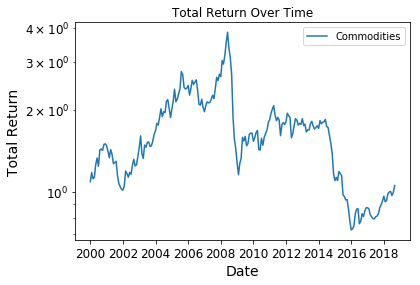

In [7]:
if(correctParams):
    fm.plot_returns(dataUser, assetNameUser, flag='Total Return')

## 2.1 OLS Model <a class="anchor" id="2.1"></a>

In [8]:
if(correctParams):
    optionsUser = fm.create_options()
    optionsUser['printLoadings'] = True
    optionsUser['nameOfReg'] = 'OLS for ' + str(assetNameUser)
    fm.linear_regression(dataUser, assetNameUser, factorNameUser, optionsUser)

Dependent Variable is Commodities
Time period is between January 2000 to September 2018 inclusive   
                     Intercept  World Equities  US Treasuries  \
OLS for Commodities   0.003103        0.364591      -0.552562   

                     Bond Risk Premium  Inflation Protection  \
OLS for Commodities          -0.226785              1.856147   

                     Currency Protection  
OLS for Commodities             -0.98636  


## 2.2 CV LASSO Model <a class="anchor" id="2.2"></a>

In [9]:
if(correctParams):
    optionsUser = fm.create_options_cv_lasso()
    optionsUser['printLoadings'] = True
    optionsUser['nameOfReg'] = 'CV Lasso for ' + str(assetNameUser)
    fm.cross_validated_lasso_regression(dataUser, assetNameUser, factorNameUser, optionsUser)

Dependent Variable is Commodities
Time period is between January 2000 to September 2018 inclusive   
Best lambda = 0.015151515574242424
                          Intercept  World Equities  US Treasuries  \
CV Lasso for Commodities   0.001683        0.348759      -0.274466   

                          Bond Risk Premium  Inflation Protection  \
CV Lasso for Commodities               -0.0              1.474027   

                          Currency Protection  
CV Lasso for Commodities            -0.710531  


## 2.3 Elastic Net Model <a class="anchor" id="2.3"></a>

In [10]:
if(correctParams):
    optionsUser = fm.create_options_cv_elastic_net()
    optionsUser['printLoadings'] = True
    optionsUser['l1Ratio'] = numL1RatioUser
    optionsUser['nLambdas'] = numLambdasUser
    optionsUser['nameOfReg'] = 'CV Elastic Net for ' + str(assetNameUser)
    fm.cross_validated_elastic_net_regression(dataUser, assetNameUser, factorNameUser, optionsUser)

Dependent Variable is Commodities
Time period is between January 2000 to September 2018 inclusive   
Best lambda1 = 1.3157895163157894e-08
Best lambda2 = 0.006578941002631365
                                Intercept  World Equities  US Treasuries  \
CV Elastic Net for Commodities    0.00232        0.380276      -0.390498   

                                Bond Risk Premium  Inflation Protection  \
CV Elastic Net for Commodities          -0.090563              1.444339   

                                Currency Protection  
CV Elastic Net for Commodities             -0.79418  


## 2.4 Best Subset Regression Model <a class="anchor" id="2.4"></a>

In [11]:
if(correctParams):
    optionsUser = fm.create_options()
    optionsUser['printLoadings'] = True
    optionsUser['maxVars'] = maxVarsUser
    optionsUser['nameOfReg'] = 'Best '+ str(optionsUser['maxVars']) + ' Subset Regression for ' + str(assetNameUser)
    fm.best_subset_regression(dataUser, assetNameUser, factorNameUser, optionsUser)

Dependent Variable is Commodities
Time period is between January 2000 to September 2018 inclusive   
Max Number of Non-Zero Variables is 3
                                          Intercept  World Equities  \
Best 3 Subset Regression for Commodities  -0.000226        0.371822   

                                          US Treasuries  Bond Risk Premium  \
Best 3 Subset Regression for Commodities            0.0                0.0   

                                          Inflation Protection  \
Best 3 Subset Regression for Commodities              1.704059   

                                          Currency Protection  
Best 3 Subset Regression for Commodities            -0.794858  
